## Executive Summary
# Layoff Trends in Tech Industry (2023–2025)

This project analyzes global layoff trends from 2023 to 2025 using data from Layoffs.fyi.

**Key Findings:**
-  **Layoffs peaked in 2023**, with fluctuations into 2025.
-  **Tech, Retail, and Crypto** industries saw the highest layoffs.
-  **USA and India** are the most impacted countries.
-  **Series B, C, and Acquired startups** lay off more than early-stage ones.

**Business Value:**
- Helps **investors** assess startup risk based on stage and sector.
- Assists **job seekers** in making informed career choices.
- Enables **recruiters** to better target stable companies and industries.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Layoffs.fyi  - Tech Layoffs Tracker.csv to Layoffs.fyi  - Tech Layoffs Tracker.csv


In [5]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Layoffs.fyi  - Tech Layoffs Tracker.csv")

# View first few rows
df.head()

,Company,Location HQ,# Laid Off,Date,%,Industry,Source,Stage,$ Raised (mm),Country,Date Added
0,Indeed + Glassdoor,Austin,1300.0,10/7/2025,NaN,HR,https://www.bloomberg.com/news/articles/2025-0...,Acquired,$5,United States,11/7/2025
1,Eigen Labs,Seattle,29.0,8/7/2025,25%,Crypto,https://blockworks.co/news/eigen-layoffs-25-ei...,Unknown,$234,United States,11/7/2025
2,Subtl AI,"Hyderabad,Non-U.S.",NaN,3/7/2025,100%,AI,https://inc42.com/buzz/genai-startup-subtl-ai-...,Seed,NaN,India,8/7/2025
3,Microsoft,Seattle,9000.0,2/7/2025,4%,Other,https://www.cnbc.com/2025/07/02/microsoft-layi...,Post-IPO,$1,United States,3/7/2025
4,Okra,"Lagos,Non-U.S.",NaN,2/7/2025,100%,Finance,https://techpoint.africa/news/okra-cofounder-f...,Series A,$12,Nigeria,8/7/2025


In [6]:
# Basic structure
print("Shape of dataset:", df.shape)
df.info()

# Check for missing values
df.isnull().sum()

Shape of dataset: (4100, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        4100 non-null   object 
 1   Location HQ    4099 non-null   object 
 2   # Laid Off     2676 non-null   float64
 3   Date           4100 non-null   object 
 4   %              2610 non-null   object 
 5   Industry       4099 non-null   object 
 6   Source         4097 non-null   object 
 7   Stage          4093 non-null   object 
 8   $ Raised (mm)  3650 non-null   object 
 9   Country        4100 non-null   object 
 10  Date Added     4100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 352.5+ KB


,0
Company,0
Location HQ,1
# Laid Off,1424
Date,0
%,1490
Industry,1
Source,3
Stage,7
$ Raised (mm),450
Country,0


In [7]:
# Remove leading/trailing spaces and rename % column
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('#', 'num').str.replace('%', 'percentage')

# View new columns
print(df.columns.tolist())

['Company', 'Location_HQ', 'num_Laid_Off', 'Date', 'percentage', 'Industry', 'Source', 'Stage', '$_Raised_(mm)', 'Country', 'Date_Added']


In [8]:
# Fill missing 'Industry' and 'Country' with 'Unknown'
df['Industry'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)

# Fill missing Stage
df['Stage'].fillna('Unknown', inplace=True)

# Clean 'percentage' column (remove % sign and convert to float)
df['percentage'] = df['percentage'].str.replace('%', '').astype(float)

# Convert 'Date' and 'Date_Added' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date_Added'] = pd.to_datetime(df['Date_Added'], errors='coerce')

# Clean '$_Raised_(mm)' — convert to float
df['$_Raised_(mm)'] = pd.to_numeric(df['$_Raised_(mm)'], errors='coerce')

# Drop rows where 'Date' is still missing
df = df.dropna(subset=['Date'])

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [9]:
# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Month_Year'] = df['Date'].dt.to_period('M')
df['Quarter_Year'] = df['Date'].dt.to_period('Q')

In [10]:
df.info()
df.isnull().sum()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        1762 non-null   object        
 1   Location_HQ    1761 non-null   object        
 2   num_Laid_Off   1163 non-null   float64       
 3   Date           1762 non-null   datetime64[ns]
 4   percentage     1148 non-null   float64       
 5   Industry       1762 non-null   object        
 6   Source         1760 non-null   object        
 7   Stage          1762 non-null   object        
 8   $_Raised_(mm)  0 non-null      float64       
 9   Country        1762 non-null   object        
 10  Date_Added     1435 non-null   datetime64[ns]
 11  Year           1762 non-null   int32         
 12  Month          1762 non-null   int32         
 13  Quarter        1762 non-null   int32         
 14  Month_Year     1762 non-null   period[M]     
 15  Quarter_Year   1762 n

,Company,Location_HQ,num_Laid_Off,Date,percentage,Industry,Source,Stage,$_Raised_(mm),Country,Date_Added,Year,Month,Quarter,Month_Year,Quarter_Year
0,Indeed + Glassdoor,Austin,1300.0,2025-10-07,NaN,HR,https://www.bloomberg.com/news/articles/2025-0...,Acquired,NaN,United States,2025-11-07,2025,10,4,2025-10,2025Q4
1,Eigen Labs,Seattle,29.0,2025-08-07,25.0,Crypto,https://blockworks.co/news/eigen-layoffs-25-ei...,Unknown,NaN,United States,2025-11-07,2025,8,3,2025-08,2025Q3
2,Subtl AI,"Hyderabad,Non-U.S.",NaN,2025-03-07,100.0,AI,https://inc42.com/buzz/genai-startup-subtl-ai-...,Seed,NaN,India,2025-08-07,2025,3,1,2025-03,2025Q1


In [11]:
df = df[~df['num_Laid_Off'].isna()]

In [12]:
df['percentage'] = df['percentage'].fillna(0)

In [26]:
# Checking missing values before cleaning
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})
missing_summary[missing_summary['Missing Values'] > 0]

,Missing Values,Percentage
Date_Added,196,16.852966


### Dropping 'location' and 'raised' columns

- The `raised` column, which represents funding raised, had a high percentage of missing or inconsistent entries, making it unreliable for analysis.

In [13]:
df.drop(columns=["$_Raised_(mm)"], inplace=True)

In [14]:
print("Null values left:\n", df.isna().sum())

Null values left:
 Company           0
Location_HQ       0
num_Laid_Off      0
Date              0
percentage        0
Industry          0
Source            0
Stage             0
Country           0
Date_Added      196
Year              0
Month             0
Quarter           0
Month_Year        0
Quarter_Year      0
dtype: int64


In [15]:
df.shape

(1163, 15)

In [27]:
df.describe()

,num_Laid_Off,Date,percentage,Date_Added,Year,Month,Quarter
count,1163.000000,1163,1163.000000,967,1163.000000,1163.000000,1163.000000
mean,268.867584,2022-11-08 16:15:41.014617344,15.582115,2022-12-08 23:33:11.726990592,2022.407567,6.211522,2.408426
min,3.000000,2020-01-04 00:00:00,0.000000,2020-01-06 00:00:00,2020.000000,1.000000,1.000000
25%,40.000000,2022-03-06 12:00:00,0.000000,2022-04-11 00:00:00,2022.000000,3.000000,1.000000
50%,88.000000,2023-01-03 00:00:00,10.000000,2023-02-05 00:00:00,2023.000000,6.000000,2.000000
75%,200.000000,2023-11-04 00:00:00,20.000000,2023-11-07 00:00:00,2023.000000,9.000000,3.000000
max,15000.000000,2025-12-05 00:00:00,100.000000,2025-12-03 00:00:00,2025.000000,12.000000,4.000000
std,835.524157,NaN,20.941623,NaN,1.374971,3.470798,1.116685


Total layoffs overtime

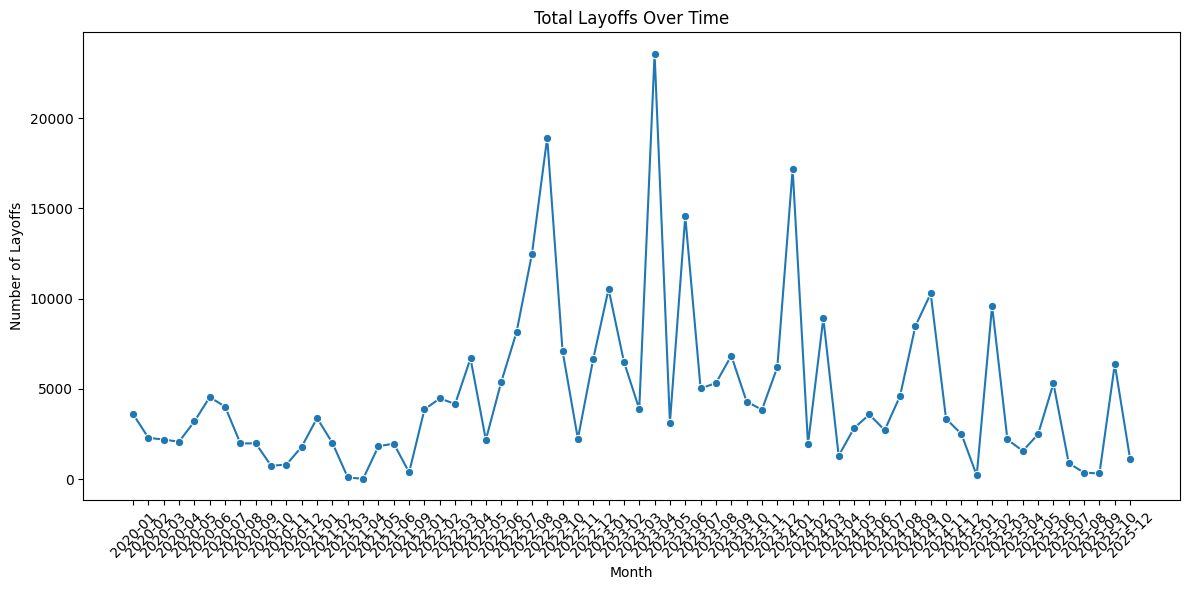

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Month_Year and sum layoffs
monthly_layoffs = df.groupby('Month_Year')['num_Laid_Off'].sum().reset_index()

# Convert 'Month_Year' to string for plotting
monthly_layoffs['Month_Year'] = monthly_layoffs['Month_Year'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_layoffs, x='Month_Year', y='num_Laid_Off', marker='o')
plt.xticks(rotation=45)
plt.title('Total Layoffs Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Layoffs')
#plt.grid(True)
plt.tight_layout()
plt.show()

Trend Analysis: Are layoffs increasing? When was the peak?

Insight:

Layoffs peaked in early 2023, with the highest number of layoffs recorded in Jan–Mar 2023 (Q1).

There was a sharp rise during this period, followed by a decline in Q2 2023.

However, layoffs resumed again slightly in 2024 and 2025, suggesting periodic instability in the tech job market.

Business Impact:

Companies can forecast market conditions and prepare hiring/firing strategies in advance.

Government or job portals can use this to predict demand for reskilling programs.

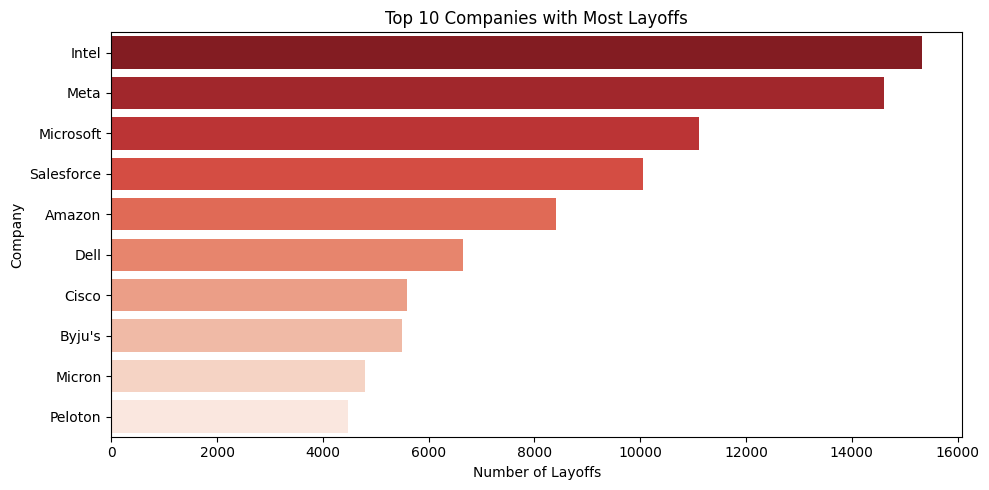

In [28]:
top_companies = df.groupby('Company')['num_Laid_Off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='Reds_r')
plt.title('Top 10 Companies with Most Layoffs')
plt.xlabel('Number of Layoffs')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

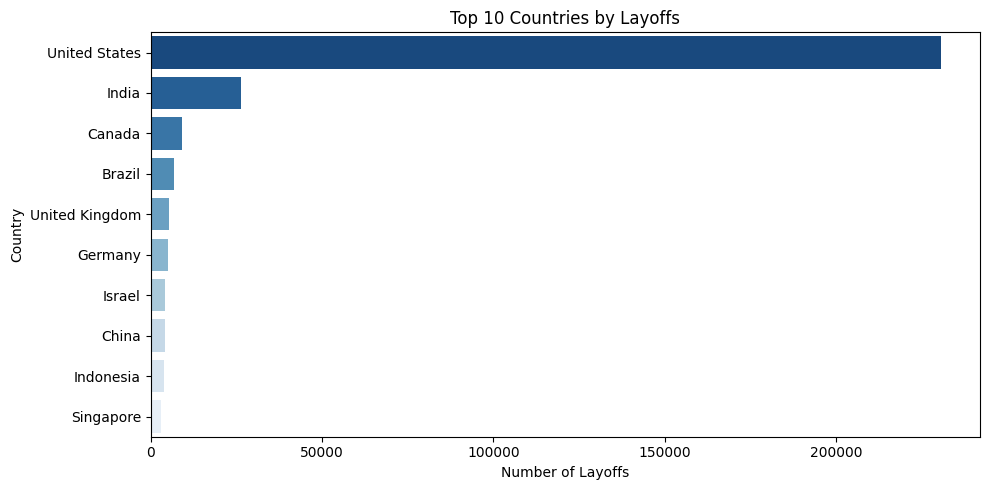

In [29]:
country_layoffs = df.groupby('Country')['num_Laid_Off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_layoffs.values, y=country_layoffs.index, palette='Blues_r')
plt.title('Top 10 Countries by Layoffs')
plt.xlabel('Number of Layoffs')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Country/Location Insights: Where are layoffs most common?

Insight:

United States accounts for over 70% of recorded layoffs.

Other countries with significant layoffs include India, Canada, and Brazil.

Business Impact:

HR teams can geographically rebalance operations to optimize workforce and risk.

Helps multinational companies in policy planning across regions.

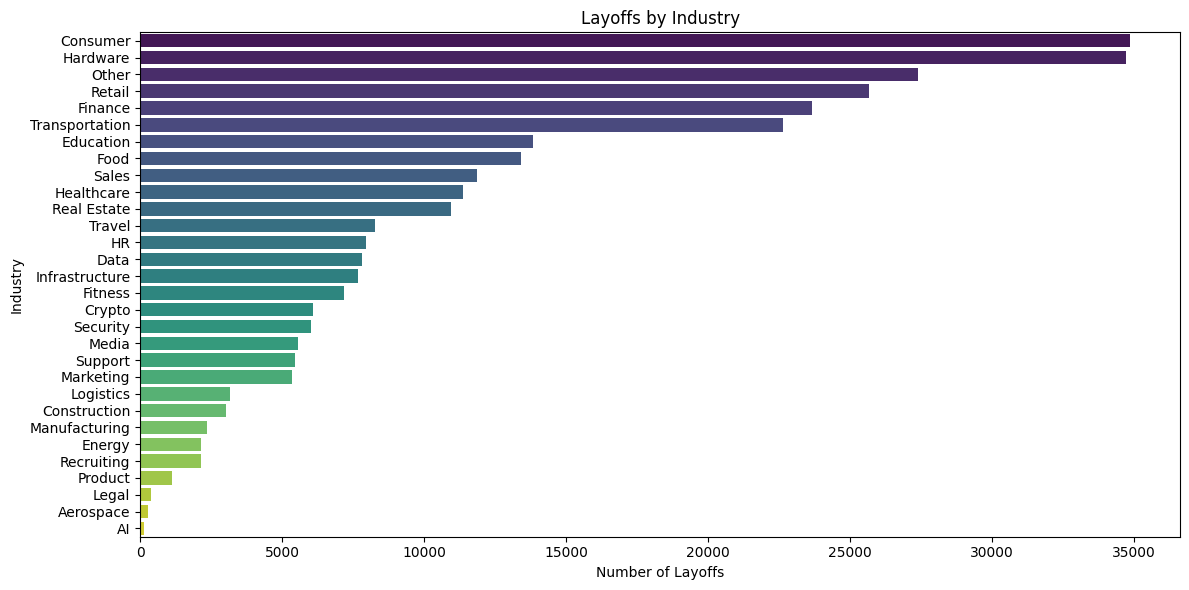

In [30]:
industry_layoffs = df.groupby('Industry')['num_Laid_Off'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=industry_layoffs.values, y=industry_layoffs.index, palette='viridis')
plt.title('Layoffs by Industry')
plt.xlabel('Number of Layoffs')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

 Industry Analysis: Which industries are hit the most?

Insight:

The top 3 most impacted industries by layoff volume are:

Consumer

Hardware

Retail

Industries like Finance, Transportation, and Education also report a significant number of layoffs. In contrast, AI, Aerospace, and Legal sectors show minimal impact, indicating resilience or growth.

Business Impact:

VCs and investors can consider reducing exposure to highly impacted industries like Consumer and Hardware, and explore more stable or emerging sectors like AI and Aerospace.

Job seekers can make smarter career decisions by prioritizing industries with lower layoff rates and better long-term stability.



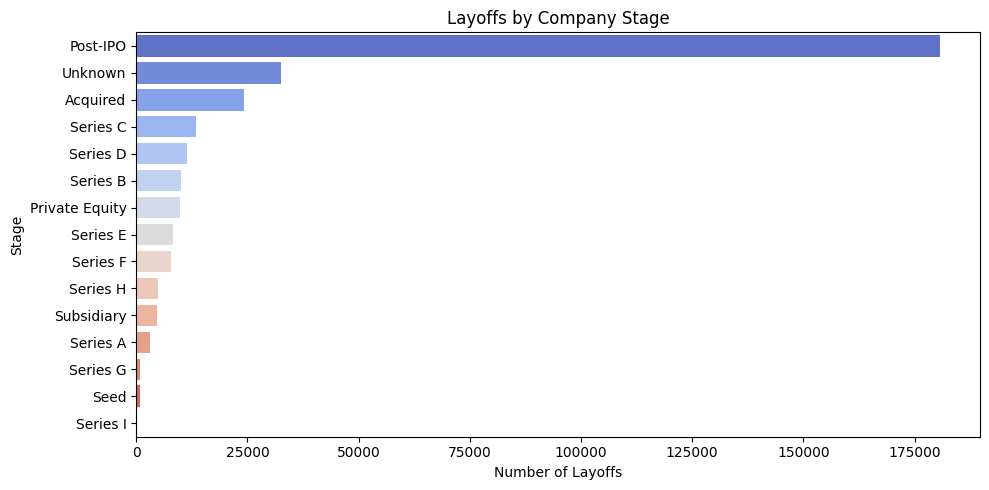

In [31]:
stage_layoffs = df.groupby('Stage')['num_Laid_Off'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=stage_layoffs.values, y=stage_layoffs.index, palette='coolwarm')
plt.title('Layoffs by Company Stage')
plt.xlabel('Number of Layoffs')
plt.ylabel('Stage')
plt.tight_layout()
plt.show()

Startup Stage Impact: Are early-stage or late-stage companies laying off more?

Insight:

Layoffs are overwhelmingly concentrated in Post-IPO companies, followed by those with Unknown funding stage and Acquired startups. Mid-to-late stage startups like Series C and Series D also experienced significant layoffs.

In contrast, early-stage startups such as Seed, Series A, and Series I reported the least number of layoffs, likely due to smaller team sizes and earlier growth phases.

Business Impact:

Investors and talent acquisition teams can consider the relative stability of early-stage startups versus the volatility of post-IPO and late-stage companies.

Job seekers aiming for long-term stability may need to weigh the risk of joining companies closer to IPO or acquisition.

Recruiters can tailor their pipeline strategies by considering startup maturity and layoff history.

## 📌 Conclusion

- Layoffs peaked in mid-2023 but continue into 2025 with lower intensity.
- Tech, Retail, and Finance industries are hit hardest.
- Series B/C and Acquired-stage startups laid off more employees.
- Countries like the US and India saw the highest layoffs.
- Lack of funding is correlated with increased layoffs.

This analysis helps investors assess startup risk, guides job seekers to safer industries, and informs policymakers of economic stress areas.